In [1]:
import tensorflow_datasets as tfds
import urllib3

urllib3.disable_warnings()

(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    split = ['train', 'test'],
    shuffle_files = True,
    with_info = True
)

Shuffling and writing examples to /home/aiffel0039/tensorflow_datasets/kitti/3.2.0.incompleteMMLR3E/kitti-train.tfrecord


Shuffling and writing examples to /home/aiffel0039/tensorflow_datasets/kitti/3.2.0.incompleteMMLR3E/kitti-validation.tfrecord


Shuffling and writing examples to /home/aiffel0039/tensorflow_datasets/kitti/3.2.0.incompleteMMLR3E/kitti-test.tfrecord


Dataset kitti downloaded and prepared to /home/aiffel0039/tensorflow_datasets/kitti/3.2.0. Subsequent calls will reuse this data.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image, ImageDraw

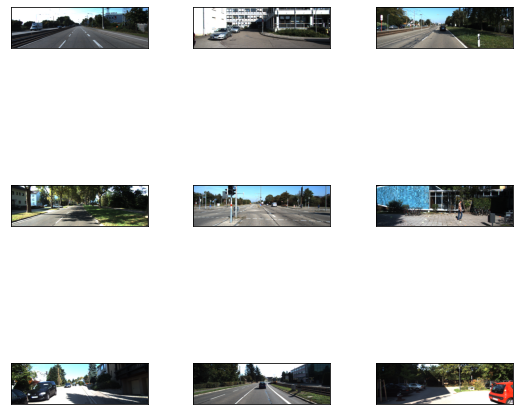

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    version=3.2.0,
    description='Kitti contains a suite of vision tasks built using an autonomous driving
platform. The full benchmark contains many tasks such as stereo, optical flow,
visual odometry, etc. This dataset contains the object detection dataset,
including the monocular images and bounding boxes. The dataset contains 7481
training images annotated with 3D bounding boxes. A full description of the
annotations can be found in the readme of the object development kit readme on
the Kitti homepage.',
    homepage='http://www.cvlibs.net/datasets/kitti/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
            'dimensions': Tensor(shape=(3,), dtype=tf.float32),
            'location': Tensor(shape=(3,), dtype

In [5]:
TakeDataset = ds_train.take(1)

--Example--
['image', 'image/file_name', 'objects']
--objects--
{'alpha': <tf.Tensor: shape=(11,), dtype=float32, numpy=
array([ 2.43,  1.94, -1.82,  1.77,  1.28, -0.49, -1.45, -1.23, -3.12,
       -1.06,  2.23], dtype=float32)>, 'bbox': <tf.Tensor: shape=(11, 4), dtype=float32, numpy=
array([[0.00266667, 0.        , 0.40141332, 0.20672303],
       [0.00266667, 0.08797906, 0.47797334, 0.37694043],
       [0.00266667, 0.6811272 , 0.5428    , 0.97288245],
       [0.33632   , 0.35143316, 0.5493867 , 0.42633656],
       [0.37885332, 0.37507245, 0.5233333 , 0.44940418],
       [0.51746666, 0.5759823 , 0.5774133 , 0.6307327 ],
       [0.20216   , 0.67591786, 0.5268267 , 0.79124796],
       [0.32770666, 0.71278584, 0.5644533 , 0.82365537],
       [0.43117332, 0.61235106, 0.57114667, 0.7259823 ],
       [0.3924    , 0.92241544, 0.5624533 , 0.99919486],
       [0.45909333, 0.8261192 , 0.56192   , 0.91829306]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(11, 3), dtype=float32, numpy=
array

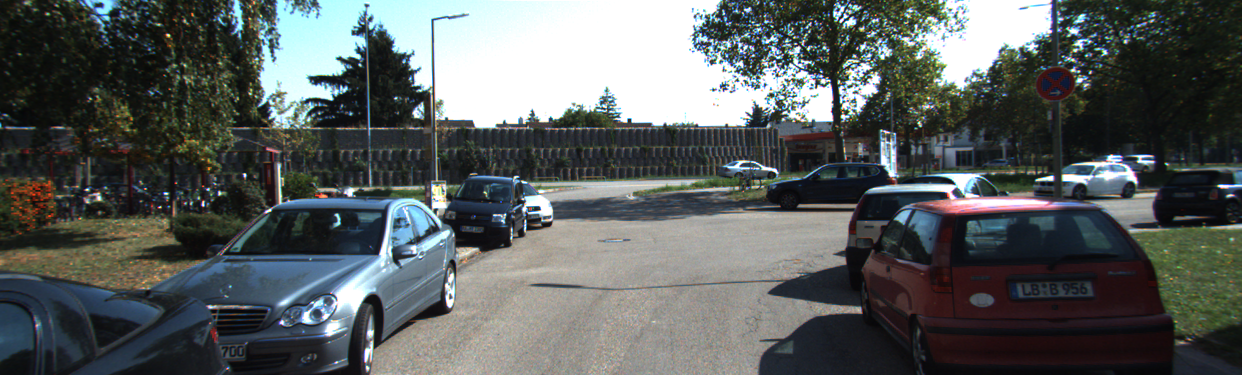

In [6]:
for example in TakeDataset:  
    print('--Example--')
    print(list(example.keys())) # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    image = example["image"]
    filename = example["image/file_name"].numpy().decode('utf-8')
    objects = example["objects"]

print('--objects--')
print(objects)
img = Image.fromarray(image.numpy())
img

1242 375
(11, 4)
[[   0.       374.       256.75     224.47   ]
 [ 109.27     374.       468.16     195.76   ]
 [ 845.95996  374.      1208.32     171.45   ]
 [ 436.47998  248.88     529.51     168.98   ]
 [ 465.84     232.93001  558.16     178.75002]
 [ 715.37     180.95     783.37006  158.47   ]
 [ 839.49     299.19     982.73     177.44   ]
 [ 885.28     252.11    1022.98     163.33002]
 [ 760.54004  213.31     901.67004  160.82   ]
 [1145.64     227.85    1241.       164.08   ]
 [1026.04     202.84    1140.52     164.28   ]]
[  0.   374.   256.75 224.47]
[109.27 374.   468.16 195.76]
[ 845.95996  374.      1208.32     171.45   ]
[436.47998 248.88    529.51    168.98   ]
[465.84    232.93001 558.16    178.75002]
[715.37    180.95    783.37006 158.47   ]
[839.49 299.19 982.73 177.44]
[ 885.28     252.11    1022.98     163.33002]
[760.54004 213.31    901.67004 160.82   ]
[1145.64  227.85 1241.    164.08]
[1026.04  202.84 1140.52  164.28]
<PIL.Image.Image image mode=RGB size=1242x375 a

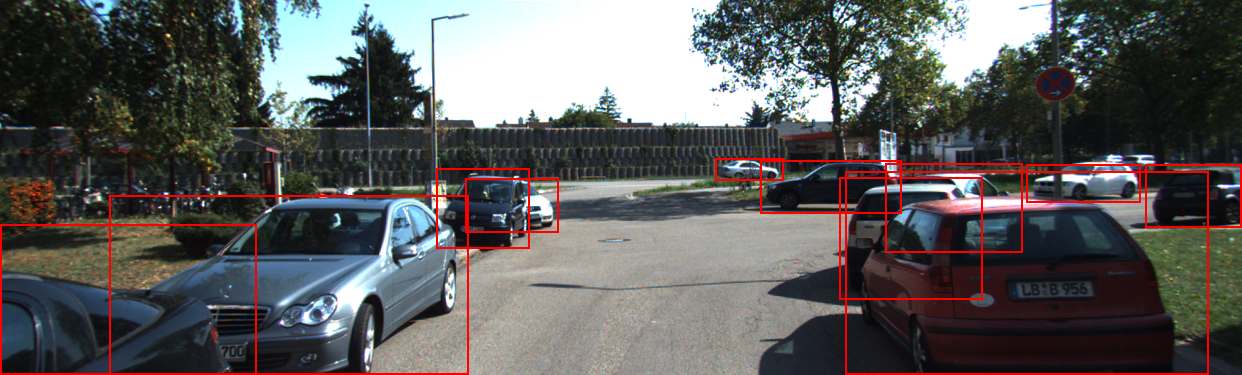

In [7]:
def visualize_bbox(input_image, object_bbox):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)

        # 바운딩 박스 좌표(x_min, x_max, y_min, y_max) 구하기
    width, height = img.size
    print(width, height)
    print(object_bbox.shape)
    x_min = object_bbox[:,1] * width
    x_max = object_bbox[:,3] * width
    y_min = height - object_bbox[:,0] * height
    y_max = height - object_bbox[:,2] * height

        # 바운딩 박스 그리기
    rects = np.stack([x_min, y_min, x_max, y_max], axis=1)
    print(rects)
    for _rect in rects:
        print(_rect)
        draw.rectangle(_rect, outline=(255,0,0), width=2)
    print(input_image)
    return input_image

visualize_bbox(img, objects['bbox'].numpy())

In [18]:
import os
data_dir = os.getenv('HOME')+'/aiffel/object_detection/data'
img_dir = os.getenv('HOME')+'/kitti_images'
train_csv_path = data_dir + '/kitti_train.csv'

# parse_dataset 함수를 구현해 주세요.
def parse_dataset(dataset, img_dir="kitti_images", total=0):
    if not os.path.exists(img_dir):
        os.mkdir(img_dir)
    # Dataset의 claas를 확인하여 class에 따른 index를 확인해둡니다.
    # 저는 기존의 class를 차와 사람으로 나누었습니다.
    type_class_map = {
        0: "car",
        1: "car",
        2: "car",
        3: "person",
        4: "person",
        5: "person",
    }
    # Keras retinanet을 학습하기 위한 dataset을 csv로 parsing하기 위해서 필요한 column을 가진 pandas.DataFrame을 생성합니다.
    df = pd.DataFrame(columns=["img_path", "x1", "y1", "x2", "y2", "class_name"])
    for item in tqdm(dataset, total=total):
        filename = item['image/file_name'].numpy().decode('utf-8')
        img_path = os.path.join(img_dir, filename)

        img = Image.fromarray(item['image'].numpy())
        img.save(img_path)
        object_bbox = item['objects']['bbox']
        object_type = item['objects']['type'].numpy()
        width, height = img.size

        # tf.dataset의 bbox좌표가 0과 1사이로 normalize된 좌표이므로 이를 pixel좌표로 변환합니다.
        x_min = object_bbox[:,1] * width
        x_max = object_bbox[:,3] * width
        y_min = height - object_bbox[:,2] * height
        y_max = height - object_bbox[:,0] * height

        # 한 이미지에 있는 여러 Object들을 한 줄씩 pandas.DataFrame에 append합니다.
        rects = np.stack([x_min, y_min, x_max, y_max], axis=1).astype(np.int)
        for i, _rect in enumerate(rects):
            _type = object_type[i]
            if _type not in type_class_map.keys():
                continue
            df = df.append({
                "img_path": img_path,
                "x1": _rect[0],
                "y1": _rect[1],
                "x2": _rect[2],
                "y2": _rect[3],
                "class_name": type_class_map[_type]
            }, ignore_index=True)
            break
    return df

df_train = parse_dataset(ds_train, img_dir, total=ds_info.splits['train'].num_examples)
df_train.to_csv(train_csv_path, sep=',',index = False, header=False)

100%|██████████| 6347/6347 [10:33<00:00, 10.02it/s]


In [10]:
test_csv_path = data_dir + '/kitti_test.csv'

df_test = parse_dataset(ds_test, img_dir, total=ds_info.splits['test'].num_examples)
df_test.to_csv(test_csv_path, sep=',',index = False, header=False)

100%|██████████| 711/711 [01:16<00:00,  9.35it/s]


In [11]:
class_txt_path = data_dir + '/classes.txt'

def save_class_format(path="./classes.txt"):
    class_type_map = {
        "car" : 0,
        "person": 1
    }
    with open(path, mode='w', encoding='utf-8') as f:
        for k, v in class_type_map.items():
            f.write(f"{k},{v}\n")

save_class_format(class_txt_path)

In [19]:
!python ~/aiffel/object_detection/keras-retinanet/keras_retinanet/bin/train.py --gpu 0 --multiprocessing --workers 4 --batch-size 2 --epochs 50 --steps 195 csv ~/aiffel/object_detection/data/kitti_train.csv ~/aiffel/object_detection/data/classes.txt

2020-10-26 14:19:17.391071: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-26 14:19:18.579668: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-26 14:19:18.606190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-26 14:19:18.606507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.455GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 327.88GiB/s
2020-10-26 14:19:18.606538: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-26 14:19:18.628613: I tensorflow/stream_executor/platform

res4c_branch2a_relu (Activation (None, None, None, 2 0           bn4c_branch2a[0][0]              
__________________________________________________________________________________________________
padding4c_branch2b (ZeroPadding (None, None, None, 2 0           res4c_branch2a_relu[0][0]        
__________________________________________________________________________________________________
res4c_branch2b (Conv2D)         (None, None, None, 2 589824      padding4c_branch2b[0][0]         
__________________________________________________________________________________________________
bn4c_branch2b (BatchNormalizati (None, None, None, 2 1024        res4c_branch2b[0][0]             
__________________________________________________________________________________________________
res4c_branch2b_relu (Activation (None, None, None, 2 0           bn4c_branch2b[0][0]              
__________________________________________________________________________________________________
res4c_bran

Epoch 1/50
2020-10-26 14:20:58.583829: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.7
2020-10-26 14:20:59.693190: W tensorflow/stream_executor/gpu/asm_compiler.cc:81] Running ptxas --version returned 256
2020-10-26 14:20:59.742053: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2020-10-26 14:21:00.094527: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2020-10-26 14:21:09.893873: I tensorflow/stream_executor/cuda/cuda_driver.cc:775] failed to allocate 2.25G (2416710656 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2020-10-26 14:21:09.893946: W tensorflow/core/common_runtime/bfc_allocator.cc:246] Allocator (GPU_0_bfc) ran out of memory trying

195/195 [==============================] - ETA: 0s - loss: 1.1581 - regression_loss: 0.9002 - classification_loss: 0.2579
Epoch 00024: saving model to ./snapshots/resnet50_csv_24.h5
195/195 [==============================] - 58s 300ms/step - loss: 1.1581 - regression_loss: 0.9002 - classification_loss: 0.2579
Epoch 25/50
195/195 [==============================] - ETA: 0s - loss: 1.2687 - regression_loss: 0.9813 - classification_loss: 0.2874
Epoch 00025: saving model to ./snapshots/resnet50_csv_25.h5
195/195 [==============================] - 57s 291ms/step - loss: 1.2687 - regression_loss: 0.9813 - classification_loss: 0.2874
Epoch 26/50
195/195 [==============================] - ETA: 0s - loss: 1.2378 - regression_loss: 0.9518 - classification_loss: 0.2860
Epoch 00026: saving model to ./snapshots/resnet50_csv_26.h5

Epoch 00026: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.
195/195 [==============================] - 56s 289ms/step - loss: 1.2378 - regression_loss:

195/195 [==============================] - ETA: 0s - loss: 1.2517 - regression_loss: 0.9742 - classification_loss: 0.2775
Epoch 00040: saving model to ./snapshots/resnet50_csv_40.h5

Epoch 00040: ReduceLROnPlateau reducing learning rate to 9.999998845134856e-18.
195/195 [==============================] - 58s 297ms/step - loss: 1.2517 - regression_loss: 0.9742 - classification_loss: 0.2775
Epoch 41/50
195/195 [==============================] - ETA: 0s - loss: 1.2246 - regression_loss: 0.9461 - classification_loss: 0.2785
Epoch 00041: saving model to ./snapshots/resnet50_csv_41.h5
195/195 [==============================] - 59s 303ms/step - loss: 1.2246 - regression_loss: 0.9461 - classification_loss: 0.2785
Epoch 42/50
195/195 [==============================] - ETA: 0s - loss: 1.1298 - regression_loss: 0.8639 - classification_loss: 0.2660
Epoch 00042: saving model to ./snapshots/resnet50_csv_42.h5
195/195 [==============================] - 59s 301ms/step - loss: 1.1298 - regression_loss:

In [20]:
!python ~/aiffel/object_detection/keras-retinanet/keras_retinanet/bin/convert_model.py ./snapshots/resnet50_csv_50.h5 ./snapshots/resnet50_csv_50_infer.h5

2020-10-26 16:25:27.006313: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-26 16:25:28.429031: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-26 16:25:28.455529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-26 16:25:28.456186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.455GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 327.88GiB/s
2020-10-26 16:25:28.456205: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-26 16:25:28.460020: I tensorflow/stream_executor/platform

In [57]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

import keras_retinanet
from keras_retinanet import models
from keras_retinanet.models import load_model
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

gpu = '0'
setup_gpu(gpu)

model_path = os.path.join('.', 'snapshots', 'resnet50_csv_50_infer.h5')
#model = load_model(model_path, backbone_name='resnet50')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Physical devices cannot be modified after being initialized
1 Physical GPUs, 1 Logical GPUs


In [34]:
print(model_path)

./snapshots/resnet50_csv_50_infer.h5


In [60]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/aiffel0039/Documents/GitHub/aiffel/Week12/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
gcc -pthread -B /home/aiffel0039/anaconda3/envs/aiffel/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/aiffel0039/anaconda3/envs/aiffel/include/python3.7m -I/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/numpy/core/incl

In [61]:
from keras_retinanet.utils import *

model = load_model(model_path, backbone_name='resnet50')

[773.28644 151.30257 846.1271  318.98914]
[770.2817  152.72285 851.6204  313.7208 ]


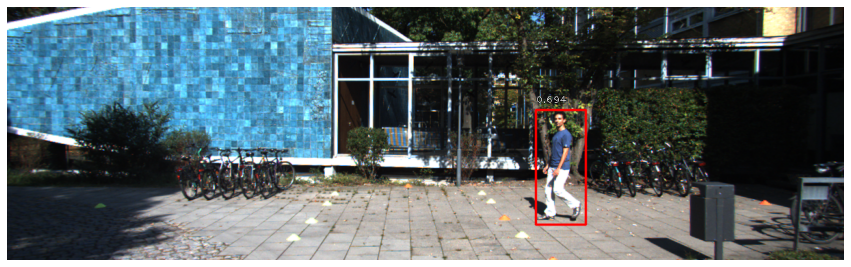

In [101]:
import os
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_1.png'
img_path = os.getenv("HOME") + '/aiffel/object_detection/test_set/stop_1.png' 


# inference_on_image 함수를 구현해 주세요.
def inference_on_image(model, img_path="./test_set/go_1.png", visualize=True):
    image = read_image_bgr(img_path)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    color_map = {
        0: (0, 0, 255), # blue
        1: (255, 0, 0) # red
    }

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

    # correct for image scale
    boxes /= scale

    # display images
    if  visualize:
        for box, score, label in zip(boxes[0], scores[0], labels[0]):
            print(box)
            if score < 0.5:
                break
            b = box.astype(int)
            draw_box(draw, b, color=color_map[label])

            caption = "{:.3f}".format(score)
            draw_caption(draw, b, caption)

        plt.figure(figsize=(15, 15))
        plt.axis('off')
        plt.imshow(draw)
        plt.show()            

inference_on_image(model, img_path=img_path)

In [87]:
img_path = os.getenv("HOME") + '/aiffel/object_detection/test_set/stop_1.png' 

image = read_image_bgr(img_path)

draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

In [88]:
image = preprocess_image(image)
image, scale = resize_image(image)

In [89]:
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

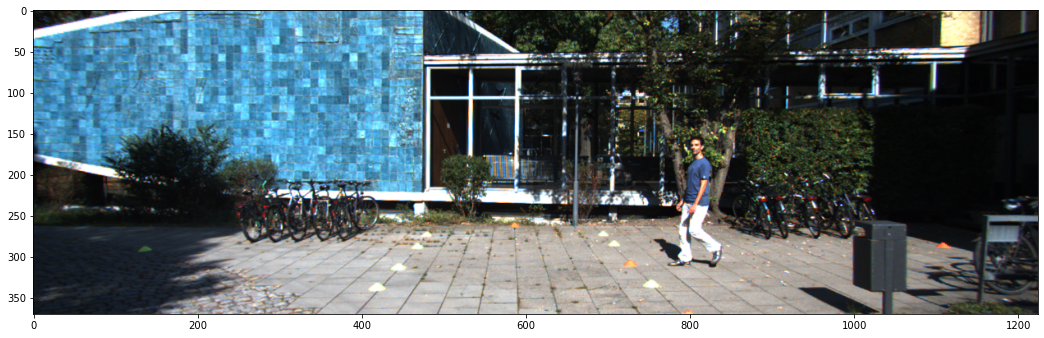

In [92]:
plt.figure(figsize=(18, 10))
plt.imshow(draw)

In [94]:
labels

array([[ 1,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
         0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

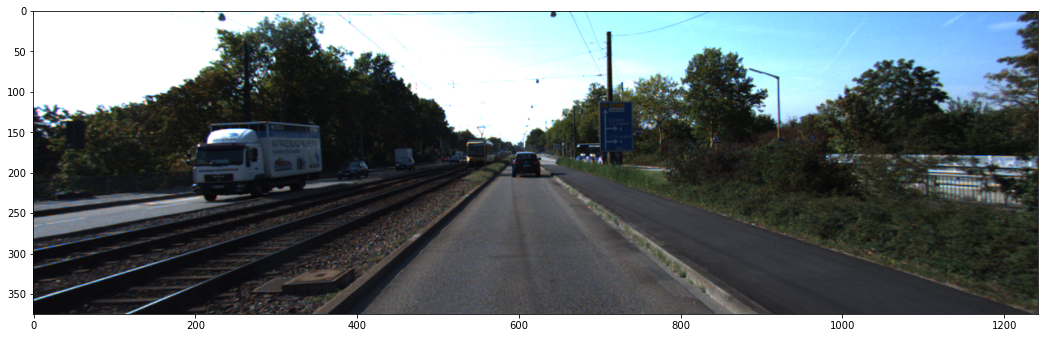

In [97]:
img_path2 = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_1.png'

img2 = read_image_bgr(img_path2)

draw = img2.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(18, 10))
plt.imshow(draw)

In [98]:
boxes, scores, labels = model.predict_on_batch(np.expand_dims(img2, axis=0))

In [99]:
labels

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [105]:
img_path = os.getenv("HOME") + '/aiffel/object_detection/test_set/stop_1.png' 
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_1.png'


def self_drive_assist(img_path, size_limit = 300):
    res = 'Go'
    img = read_image_bgr(img_path)
    
    draw = img.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(img, axis=0))
    
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        #print(box)
        if score < 0.5:
            break
        if label == 1: #사람이 있는 경우
            res = 'Stop'
            break
        if box[2] - box[0] > 300:
            res = 'Stop'
            break
    
    return res
    
    
print(self_drive_assist(img_path))

Go


In [109]:
import os

def test_system(func):
    work_dir = os.getenv('HOME')+'/aiffel/object_detection'
    score = 0
    test_set=[
        ("test_set/stop_1.png", "Stop"),
        ("test_set/stop_2.png", "Stop"),
        ("test_set/stop_3.png", "Stop"),
        ("test_set/stop_4.png", "Stop"),
        ("test_set/stop_5.png", "Stop"),
        ("test_set/go_1.png", "Go"),
        ("test_set/go_2.png", "Go"),
        ("test_set/go_3.png", "Go"),
        ("test_set/go_4.png", "Go"),
        ("test_set/go_5.png", "Go"),
    ]

    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = self_drive_assist(image_path)
        if pred == answer:
            score += 10
    print(f"{score}점입니다.")

test_system(self_drive_assist)

80점입니다.
